This notebooks contains figures and analysis of the [value proposition 2 (grounding constructs on tasks)](https://www.notion.so/mortynia/VP2-Ground-constructs-on-tasks-a82e05b067dd49c883095ee0bf42cc5e).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set('paper', 'whitegrid')  # noqa

from python.cogtext.datasets.pubmed import PubMedDataLoader

# load the data
PUBMED = PubMedDataLoader(preprocessed=False).load()

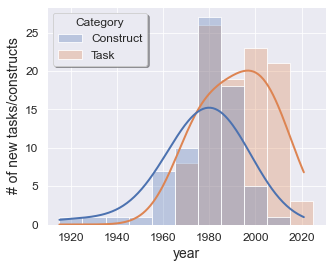

In [42]:
# figure 1: the year a construct or a task was first published

sns.set('paper')

first_pub_years = PUBMED.groupby(['category','label'])['year'].min().reset_index()

# first_pub_years['year'] = first_pub_years['year'].astype('category')

fig, ax = plt.subplots(figsize=(5, 4))

g = sns.histplot(
  data=first_pub_years,
  x='year',
  hue='category',
  binwidth=10,
  ax=ax,
  alpha=.3,
  kde_kws={'bw_adjust': 2},
  line_kws={'lw': 2},
  kde=True)

g.set(
    xlabel='year',
    ylabel='# of new tasks or constructs',
    # title='First publication year of tasks or constructs',
)

plt.ylabel('# of new tasks/constructs', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

legend = ax.get_legend()
legend.remove()
ax.legend(legend.legendHandles,
          ['Construct','Task'], title='Category',
          title_fontsize=12,
          shadow=True,
          fontsize=12)

plt.show()

In [102]:
def first_opcon_year(articles):

  category = articles.name[0]
  if category == 'CognitiveTask':
    first_pub_year = articles['year'].min()#.astype('int')
    
    first_construct_year = PUBMED.query(
      'category == "CognitiveConstruct" and pmid in @articles.pmid'
    )['year'].min()
   
    return first_construct_year - first_pub_year
  
  elif category == 'CognitiveConstruct':
    first_pub_year = articles['year'].min()#.astype('int')
    
    first_task_year = PUBMED.query(
      'category == "CognitiveTask" and pmid in @articles.pmid'
    )['year'].min()
      
    #['year'].min().astype('int')
    
    return first_task_year - first_pub_year

times_to_opcon = PUBMED.groupby(['category','label']).apply(first_opcon_year).dropna()

n_opcons = times_to_opcon[times_to_opcon > 0].count()
n_articles = PUBMED['pmid'].nunique()


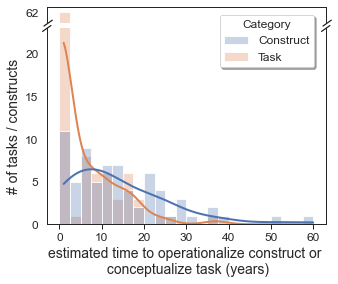

In [219]:
# figure 2: the first time a construct has been operationalized by a task in a publication
sns.set_context('paper')
sns.set_style('white')

f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(5, 4), gridspec_kw={'height_ratios': [1, 12]}
)
plt.subplots_adjust(hspace=.05)

sns.histplot(
  data=times_to_opcon.reset_index(),
  x=0,
  binwidth=2.5,
  ax=ax,
  alpha=.3,
  hue='category',
  legend=False,
  kde=False)
  
sns.histplot(
  data=times_to_opcon.reset_index(),
  x=0,
  binwidth=2.5,
  ax=ax2,
  alpha=.3,
  # legend=False,
  hue='category',
  kde_kws={'bw_adjust': 1, 'cut': 0, 'clip': (1, None)},
  line_kws={'lw': 2},
  kde=True).set(
    # title=f'Time to the operationalize {n_operationalized_connstructs} constructs \n'
          # f'(i.e., years taken for the first co-appeared task in {n_articles} articles)',
)

legend = ax2.get_legend()
legend.remove()
ax2.legend(legend.legendHandles,
          ['Construct','Task'], title='Category',
          title_fontsize=12,
          bbox_to_anchor=(.98, 1.1),
          shadow=True,
          fontsize=12)

ax.set_ylim(60, 63)
ax2.set_ylim(0, 23)

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
# ax.xaxis.tick_top()
# ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


plt.ylabel('# of tasks / constructs', fontsize=14)
plt.xlabel('estimated time to operationalize construct or \n conceptualize task (years)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


#
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d + .005, +d + .005), (-d*12 + .005, +d*12 + 0.005), **kwargs)        # top-left diagonal
ax.plot((1 - d + .005, 1 + d + .005), (-d*12  + .005, +d*12  + .005), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax.set_yticks([62])
ax.set_yticklabels([62], fontsize=12)
ax2.set_yticks([0, 5, 10, 15, 20])
plt.xticks(fontsize=12)
ax.set(ylabel=None)

plt.show()